## This notebook is purely functions as notes for my final code, so its not really documented, not coherent, you can just find my ideas, and attempts for different results!


### Importing the neccesery libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import sklearn as sk
import sklearn.preprocessing as pre
sns.set()

In [2]:
%matplotlib inline

### Data import, removing additional headers from scraping

In [3]:
data = pd.read_csv('jarmuvek.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
data.drop(list(data.loc[data["Évjárat:"] == "Évjárat:"].index), inplace=True)

In [5]:
data


,Évjárat:,Állapot:,Kivitel:,Akciós ár:,Vételár:,Vételár EUR:,Üzemanyag:,Hengerűrtartalom:,Teljesítmény:,Sebességváltó fajtája:,...,Szín:,Hajtás:,Ajtók száma:,Szállítható szem. száma:,Kilométeróra állása:,Csomagtartó:,Klíma fajtája:,Műszaki vizsga érvényes:,márka,típus
0,2021/10,Újszerű,Terepjáró,NaN,NaN,€ 20 143,Benzin,1 497 cm³,"120 kW, 163 LE",Manuális (6 fokozatú),...,NaN,Első kerék,5,5 fő,13 km,551 liter,Manuális klíma,2025/10,SSANGYONG,KORANDO
1,2015/6,Megkímélt,Sedan,NaN,5 499 000 Ft,€ 14 947,Dízel,1 968 cm³,"110 kW, 150 LE",Automata,...,Szürke,Első kerék,4,5 fő,115 662 km,586 liter,Digitális kétzónás klíma,2022/12,VOLKSWAGEN,PASSAT
2,2015/10,Megkímélt,Ferdehátú,NaN,5 490 000 Ft,€ 14 633,Benzin,1 969 cm³,"112 kW, 152 LE",Manuális (6 fokozatú),...,Fehér,Első kerék,5,5 fő,115 000 km,335 liter,Digitális kétzónás klíma,2023/10,VOLVO,V40
3,2021,Kitűnő,Kombi,NaN,22 990 000 Ft,€ 61 277,Elektromos,NaN,"140 kW, 190 LE",Fokozatmentes automata,...,Kék (metál),Első kerék,5,5 fő,13 250 km,340 liter,Digitális klíma,NaN,MERCEDES-BENZ,EQA
4,2018/3,Normál,Városi terepjáró (crossover),NaN,21 990 000 Ft,€ 58 612,Benzin,4 663 cm³,"335 kW, 455 LE",Automata (9 fokozatú tiptronic),...,Fekete,Összkerék,5,7 fő,56 571 km,680 liter,Digitális kétzónás klíma,2021/11,MERCEDES-BENZ,GLS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70208,2007,Kitűnő,Sedan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,134 000 km,NaN,NaN,NaN,LINCOLN,TOWN
70209,1979/10 (30 évnél öregebb),Megkímélt,Terepjáró,NaN,NaN,NaN,Benzin,2 445 cm³,"59 kW, 80 LE",Manuális (4 fokozatú),...,Fekete,Összkerék,5.0,7 fő,54 000 km,NaN,NaN,NaN,UAZ,469
70210,2017/4,Újszerű,Városi terepjáró (crossover),NaN,NaN,NaN,Dízel,2 993 cm³,"230 kW, 313 LE",Automata (8 fokozatú tiptronic),...,Fekete (metál),Összkerék,5.0,5 fő,5 451 km,550 liter,Digitális kétzónás klíma,NaN,BMW,X6
70211,2018/11,Újszerű,Városi terepjáró (crossover),NaN,NaN,NaN,Dízel,2 993 cm³,"294 kW, 400 LE",Automata (8 fokozatú tiptronic),...,Fekete (metál),Összkerék,5.0,5 fő,66 000 km,650 liter,Digitális többzónás klíma,NaN,BMW,X5


In [6]:
data.describe(include="all")

,Évjárat:,Állapot:,Kivitel:,Akciós ár:,Vételár:,Vételár EUR:,Üzemanyag:,Hengerűrtartalom:,Teljesítmény:,Sebességváltó fajtája:,...,Szín:,Hajtás:,Ajtók száma:,Szállítható szem. száma:,Kilométeróra állása:,Csomagtartó:,Klíma fajtája:,Műszaki vizsga érvényes:,márka,típus
count,70209,70209,70209,0,66037,69718,69589,67774,69296,65186,...,54923,64518,68223,68638,70209,58481,62835,52650,70209,70209
unique,900,5,16,0,5976,8520,12,942,426,48,...,74,5,9,13,26387,637,6,134,134,1389
top,2022,Normál,Ferdehátú,NaN,999 000 Ft,€ 2 663,Benzin,1 598 cm³,"110 kW, 150 LE",Manuális (5 fokozatú),...,Fehér,Első kerék,5,5 fő,Nincs megadva,500 liter,Digitális kétzónás klíma,2024/3,BMW,ASTRA
freq,2513,26783,20579,NaN,448,416,37206,4800,4184,25115,...,6787,45139,45592,57018,1558,1894,20802,4001,6245,1970


# Preprocessing data

### clearing out letters,spaces from values, making numeric values from string to numeric

In [7]:
data["Vételár:"].replace(["\xa0", "Ft"], "", regex=True, inplace=True)
data["Vételár EUR:"].replace( ["\xa0", "€"],  "", regex=True, inplace=True)
data["Kilométeróra állása:"].replace( ["\xa0", "km"],  "", regex=True, inplace=True)
data["Hengerűrtartalom:"].replace( ["\xa0", "cm³"],  "", regex=True, inplace=True)
data["Szállítható szem. száma:"].replace( ["\xa0", "fő"],  "", regex=True, inplace=True)
data["Teljesítmény:"].replace(["kW", "LE"], "", regex=True, inplace=True)
data["Csomagtartó:"].replace( ["\xa0", "liter"],"", regex=True, inplace=True )
data["Teljes tömeg:"].replace( ["\xa0", "kg"],"", regex=True, inplace=True )
data["Vételár:"]= pd.to_numeric(data["Vételár:"], errors="coerce")
data["Vételár EUR:"]= pd.to_numeric(data["Vételár EUR:"], errors="coerce")
data["Kilométeróra állása:"]= pd.to_numeric(data["Kilométeróra állása:"], errors="coerce")
data["Hengerűrtartalom:"]= pd.to_numeric(data["Hengerűrtartalom:"], errors="coerce")
data["Szállítható szem. száma:"]= pd.to_numeric(data["Szállítható szem. száma:"], errors="coerce")
data["Csomagtartó:"]= pd.to_numeric(data["Csomagtartó:"], errors="coerce")
data["Teljes tömeg:"]= pd.to_numeric(data["Teljes tömeg:"], errors="coerce")
data["Ajtók száma:"]= pd.to_numeric(data["Ajtók száma:"], errors="coerce")

### holding only year from datetime, holding only HP from Performance, making gearbox values into 3 category

In [8]:
data["Évjárat:"] = data["Évjárat:"].str.split("/").str[0]
data["Évjárat:"]= pd.to_numeric(data["Évjárat:"], errors="coerce")
data["Műszaki vizsga érvényes:"] = data["Műszaki vizsga érvényes:"].str.split("/").str[0]
data["Műszaki vizsga érvényes:"]= pd.to_numeric(data["Műszaki vizsga érvényes:"], errors="coerce")
data["Teljesítmény:"] = data["Teljesítmény:"].str.split(",").str[1]
data["Teljesítmény:"]= pd.to_numeric(data["Teljesítmény:"], errors="coerce")
#data["Sebességváltó fajtája:"] = data["Sebességváltó fajtája:"].apply(lambda x: "automata" if "automata" in str(x).lower() else("manuális" if "manuális" in str(x).lower() else "egyéb"))

### Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

v = data[["Évjárat:","Hengerűrtartalom:", "Teljesítmény:", "Teljes tömeg:","Szállítható szem. száma:","Kilométeróra állása:","Csomagtartó:"]]
v = add_constant(v)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(v.values, i) for i in range(v.shape[1])]
vif["features"] = v.columns
vif

In [ ]:
data.corr()

### inspecting and dealing with missing values

In [ ]:
data.isna().sum()

In [9]:
# The sale price column may have been scraped wrongly, all value missing, so dropping the column
data.drop(["Akciós ár:", "Vételár:"], axis=1,inplace=True)
# the műszaki and color has more than 20% missing value, and for the variables, its not predictable, or logic to handle these so dropping these 2 columns
#data.drop("Szín:", axis=1,inplace=True)
#data.drop(["típus"], axis=1, inplace=True)

### reducing variety of categorical variables


In [12]:
data.nunique()

Évjárat:                       81
Állapot:                        5
Kivitel:                       16
Vételár EUR:                 8520
Üzemanyag:                     12
Hengerűrtartalom:             942
Teljesítmény:                 421
Sebességváltó fajtája:          3
Okmányok jellege:               7
Teljes tömeg:                1100
Szín:                          74
Hajtás:                         5
Ajtók száma:                    5
Szállítható szem. száma:       13
Kilométeróra állása:        26386
Csomagtartó:                  637
Klíma fajtája:                  6
Műszaki vizsga érvényes:       14
márka                         134
típus                        1389
dtype: int64

In [13]:
data["Kivitel:"].mask(data["Kivitel:"].map(data["Kivitel:"].value_counts(normalize=True)) < 0.01, "other", inplace=True)
data["márka"].mask(data["márka"].map(data["márka"].value_counts(normalize=True)) < 0.001, "other", inplace=True)

In [ ]:
sns.scatterplot(data["Vételár EUR:"], data["Kilométeróra állása:"])

In [ ]:
if data["Állapot:"].dtype == "O":
    print("yes")

In [ ]:
list(data["Állapot:"].value_counts().index)

In [ ]:
data5 = data[["Állapot:", "Kivitel:"]]
data5 = pd.get_dummies(data5)
data5

In [ ]:
d = pd.DataFrame(columns=["b","w"])
d["b"] = 5
d

### standardizing the data

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = data.select_dtypes(include=numerics)
newdf.drop(["Vételár EUR:"], axis=1, inplace=True)
scaler = pre.StandardScaler()
scaler.fit(newdf)
transformed = scaler.transform(newdf)
g = pd.DataFrame(transformed)
g
data[["Évjárat:","Hengerűrtartalom:", "Teljesítmény:", "Teljes tömeg:","Szállítható szem. száma:","Kilométeróra állása:","Csomagtartó:"]] = g





### plotting data ( boxplots, distributions)

<AxesSubplot:xlabel='Teljesítmény:'>

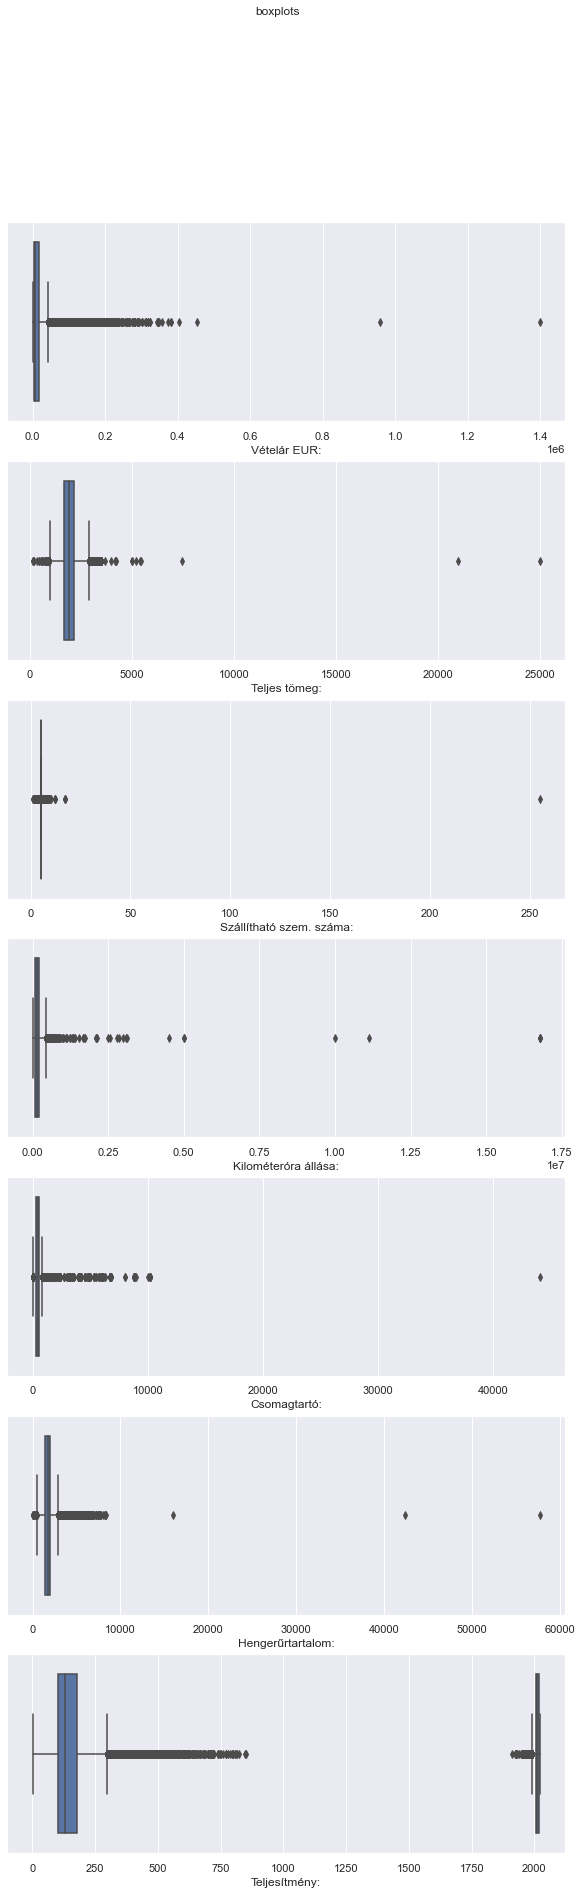

In [69]:
fig, axes = plt.subplots(7,1,figsize=(10,30))
fig.suptitle("boxplots")
sns.boxplot(ax=axes[0], x=data["Vételár EUR:"])
sns.boxplot(ax=axes[1], x=data["Teljes tömeg:"])
sns.boxplot(ax=axes[2], x=data["Szállítható szem. száma:"])
sns.boxplot(ax=axes[3], x=data["Kilométeróra állása:"])
sns.boxplot(ax=axes[4], x=data["Csomagtartó:"])
sns.boxplot(ax=axes[5], x=data["Hengerűrtartalom:"])
sns.boxplot(ax=axes[6], x=data["Évjárat:"])
sns.boxplot(ax=axes[6], x=data["Teljesítmény:"])


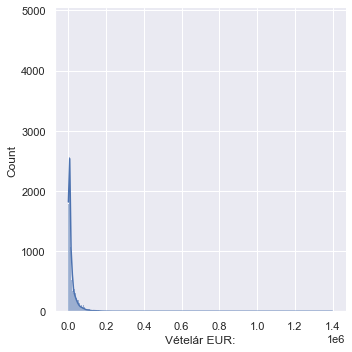

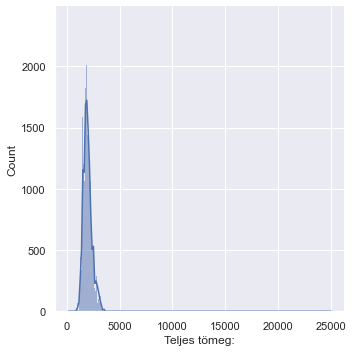

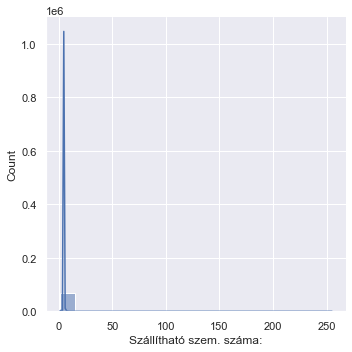

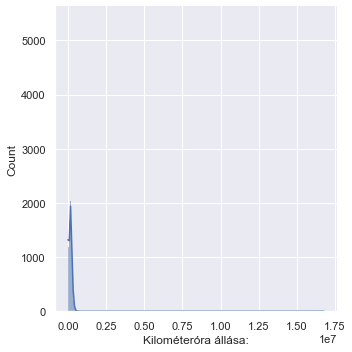

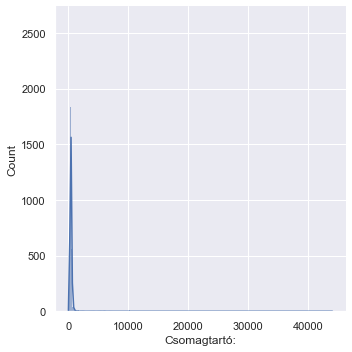

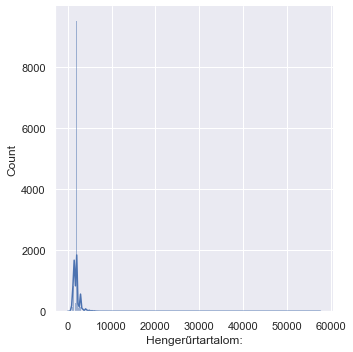

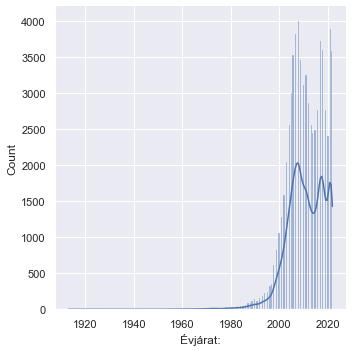

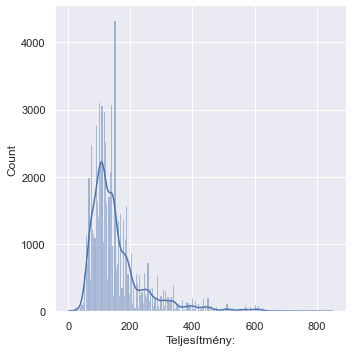

In [10]:
# fig, axes = plt.subplots(7,1,figsize=(10,40))
# fig.suptitle("boxplots")
sns.displot( x=data["Vételár EUR:"], kde=True)
sns.displot( x=data["Teljes tömeg:"], kde=True)
sns.displot( x=data["Szállítható szem. száma:"], kde=True)
sns.displot( x=data["Kilométeróra állása:"], kde=True)
sns.displot( x=data["Csomagtartó:"], kde=True)
sns.displot( x=data["Hengerűrtartalom:"], kde=True)
sns.displot( x=data["Évjárat:"], kde=True)
sns.displot( x=data["Teljesítmény:"], kde=True)



### trancforming price with log

In [11]:
log_price = np.log(data['Vételár EUR:'])
data['Vételár EUR:'] = log_price


### dropping outliers

In [72]:
for i in ["Vételár EUR:","Kilométeróra állása:","Teljes tömeg:","Csomagtartó:","Teljesítmény:","Szállítható szem. száma:"]:
    q_low = data[i].quantile(0.01)
    q_hi  = data[i].quantile(0.99)
    data = data[(data[i] < q_hi) & (data[i] > q_low)]

In [15]:
for i in range(100):
    data.drop(list(data.loc[data["Kilométeróra állása:"] == data["Kilométeróra állása:"].max()].index), inplace=True)
    #data.drop(list(data.loc[data["Csomagtartó:"] == data["Csomagtartó:"].max()].index), inplace=True)
    #data.drop(list(data.loc[data["Szállítható szem. száma:"] == data["Szállítható szem. száma:"].max()].index), inplace=True)
    data.drop(list(data.loc[data["Teljes tömeg:"] == data["Teljes tömeg:"].max()].index), inplace=True)
    #data.drop(list(data.loc[data["Hengerűrtartalom:"] == data["Hengerűrtartalom:"].max()].index), inplace=True)
    data.drop(list(data.loc[data["Vételár EUR:"] == data["Vételár EUR:"].max()].index), inplace=True)


In [ ]:
#data = data[(data["Vételár EUR:"] <  np.percentile(data["Vételár EUR:"],95)) & (data["Vételár EUR:"] >  np.percentile(data["Vételár EUR:"],5))]

### filling missing values with mode

In [ ]:
for column in data:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [12]:
data.dropna(inplace=True)

In [ ]:
#predicting missing values wiht regresssion
i = 

In [ ]:
sns.scatterplot(data["Vételár EUR:"], data['Teljesítmény:'], s=2)


In [ ]:
data["telj^2"] = data["Teljesítmény:"]**2

In [ ]:
sns.scatterplot(data["Vételár EUR:"], data['Hengerűrtartalom:'], s=2)

In [ ]:
data.quantile(0.01, axis=0)

In [ ]:
data_new = data[["Vételár EUR:", "Üzemanyag:", "Teljesítmény:", "Évjárat:", "Kilométeróra állása:"]]


In [ ]:
data_new

In [ ]:
data

### making dummies from categorical variables

In [13]:
data = pd.get_dummies(data, drop_first=True)

In [ ]:
data_new =  pd.get_dummies(data_new, drop_first=True)

In [ ]:
data_new

In [ ]:
data_new.corr()

### splitting into inputs and targets and train and test

In [14]:
targets = data['Vételár EUR:']
#targets = data[3]
inputs = data.drop(['Vételár EUR:'],axis=1)
#inputs = data.drop([3],axis=1)

In [ ]:
targets1 = data_new['Vételár EUR:']
#targets = data[3]
inputs1 = data_new.drop(['Vételár EUR:'],axis=1)
#inputs = data.drop([3],axis=1)

In [ ]:
from sklearn.feature_selection import f_regression

In [ ]:
f_regression(inputs,targets)[1].round(3)

In [ ]:
f_regression(inputs1,targets1)[1].round(3)

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=365)

In [ ]:
from sklearn.model_selection import train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(inputs1, targets1, test_size=0.2, random_state=365)

### linear regression with sklearn

In [16]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train1,y_train1)

In [17]:
reg.score(x_train,y_train)

0.955767815846668

In [ ]:
reg.score(x_train1,y_train1)

In [ ]:
reg.coef_

In [ ]:
x_test

In [ ]:
m = ['Üzemanyag:', "ben"]
h = ['Benzin', "asdfa"]
p = pd.DataFrame([h], columns=m)
p

In [18]:
y_hat_test = reg.predict(x_test)

In [ ]:
y_hat_test1 = reg.predict(x_test1)

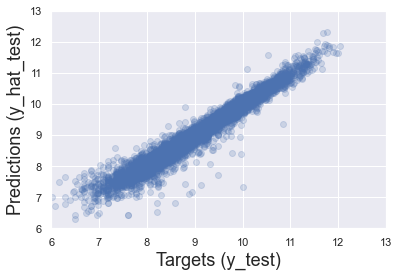

In [23]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [24]:
df_pf1 = pd.DataFrame(np.exp(y_hat_test1), columns=['Prediction'])
y_test1 = y_test1.reset_index(drop=True)
df_pf1['Target'] = np.exp(y_test1)
df_pf1

NameError: name 'y_hat_test1' is not defined

In [34]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,13554.529256,12501.0
1,38734.795026,39421.0
2,10885.456596,9326.0
3,5760.130839,5304.0
4,9846.683353,9302.0
...,...,...
7076,18664.149395,15966.0
7077,2585.820131,1466.0
7078,7998.204158,7194.0
7079,6926.761131,6370.0


In [21]:
sk.metrics.r2_score(y_test, y_hat_test)

0.9518444084610199

In [ ]:
sk.metrics.explained_variance_score(y_test1, y_hat_test1)

In [ ]:
sk.metrics.r2_score(y_test, y_hat_test)

In [ ]:
sk.metrics.mean_squared_error(y_test, y_hat_test)

### linear regression with statsmodels

In [ ]:
sm.add_constant(inputs)

In [ ]:
results = sm.OLS(targets,inputs).fit()

In [ ]:
results.summary()

In [ ]:
y_hat_test = results.predict(x_test)
y_hat_test

In [ ]:
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = np.exp(y_test)
df_pf

### usint neural network

In [ ]:
x_train1, x_validation, y_train1, y_validation = train_test_split(x_train, y_train, test_size=0.2, random_state=365)

In [ ]:
np.savez("hasznaltauto_data_train", inputs=x_train1, targets=y_train1)
np.savez("hasznaltauto_data_validation", inputs=x_validation, targets=y_validation)
np.savez("hasznaltauto_data_test", inputs=x_test, targets=y_test)

In [ ]:
data.shape

In [ ]:
scaler = pre.StandardScaler()
scaler.fit(inputs)
transformed = scaler.transform(inputs)
inputs = pd.DataFrame(transformed)
inputs